<a href="https://colab.research.google.com/github/hafilmr/LearningCodeTrainee/blob/main/Machine%20Learning%20Methods/Extrapolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Extrapolation**

Extrapolation is an estimation of a value based on extending a known sequence of values or facts beyond the area that is certainly known. In a general sense, to extrapolate is to infer something that is not explicitly stated from existing information.

## **Goal**

Goal of this lecture is to figure out h**ow different machine learning models perform** on data **outside the range of values it was trained on**.

This is a question we have to answer for time series analysis.

So picture a time series with a clear trend like a stock price.

Now, clearly, if we split this data into train and test. The test, it will take on different values than the train set.

This is because the TIME series is increasing.

The question to consider in this lecture is can machine learning predict values outside of the range of the train set?

If the answer is yes, then it would make sense to plug stock prices into machine learning models.

But if the answer is no, then it would not make sense.

In that case, it's probably better to use something like stock returns.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [ ]:
N = 1000
x = np.random.random((N, 2)) * 6 - 3 #uniformly distributed between (-3, +3)
y = np.cos(2*x[:,0]) + np.cos(3*x[:,1])

This implements the function:

*y=cos(2x1)+cos(3x2)*

In [ ]:
x

array([[ 1.82380835, -0.64612947],
       [-0.17399176, -0.39713584],
       [-1.09835569, -0.53977731],
       ...,
       [-1.47354748, -1.77178941],
       [-2.96108093, -0.71677385],
       [ 1.95421495,  2.02656136]])

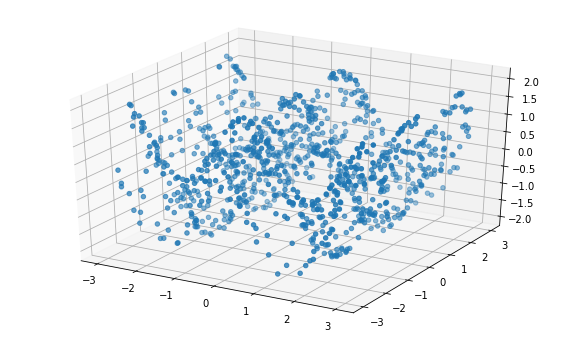

In [ ]:
# Plot it
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y);

Base by plot results, It's a repeating sine wave that goes on forever and both the next one, the next two directions.


### **Support Vector Machine (by Regression) Models**

In [ ]:
# SVR
modelSVR = SVR(C=100) #c is parameter for balance the amount of regulariszation
modelSVR.fit(x, y)

SVR(C=100)

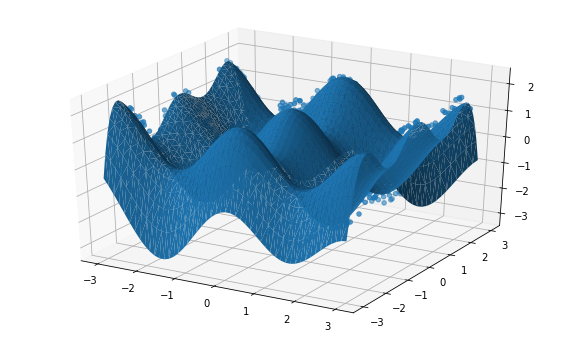

In [ ]:
# Plot the prediction surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y)

# Surface plot
line = np.linspace(-3, 3, 50) #creating numeric sequences (start, stop, num=50)
xx, yy = np.meshgrid(line, line)
xgrid = np.vstack((xx.flatten(), yy.flatten())).T
yhat = modelSVR.predict(xgrid).flatten()
ax.plot_trisurf(xgrid[:,0], xgrid[:,1], yhat, linewidth=0.2, antialiased=True)

Based by plot, we can see that our model seems to do a pretty good job at learning this function, the support vector machine is pretty powerful.

So this is not unexpected.


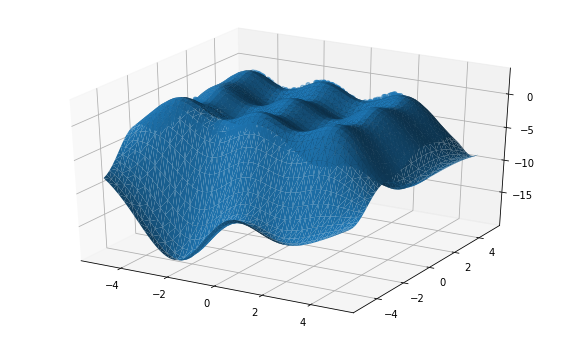

In [ ]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:, 1], y)

# Surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
xgrid = np.vstack((xx.flatten(), yy.flatten())).T
yhat = modelSVR.predict(xgrid).flatten()
ax.plot_trisurf(xgrid[:,0], xgrid[:,1], yhat, linewidth=0.2, antialiased=True)
plt.show();

Based by plot results, we see that when we extend the range of values, our model does not extrapolate well.

Sometimes people ask: isn't that the true function?

NO! The true function is given above:

>  y=cos(2x)+cos(3x2)


Dont forget it this time!

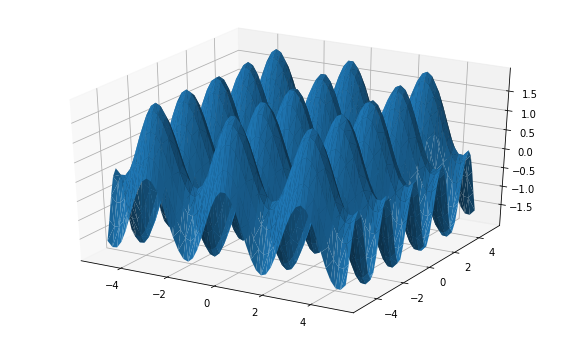

In [ ]:
# What the true function looks like?
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x[:,0], x[:,1], y)

# Surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
xgrid = np.vstack((xx.flatten(), yy.flatten())).T
ytrue = np.cos(2*xgrid[:,0]) + np.cos(3*xgrid[:,1]) #The true function
ax.plot_trisurf(xgrid[:,0], xgrid[:,1], ytrue, linewidth=0.2, antialiased=True)
plt.show()

This plot is a plot of the true function, remember, it's a sine wave that repeats in every direction.

### **Random Forest (by Regressor) Models**

In [ ]:
#Random Forest Regressor
modelRFR = RandomForestRegressor()
modelRFR.fit(x, y)

RandomForestRegressor()

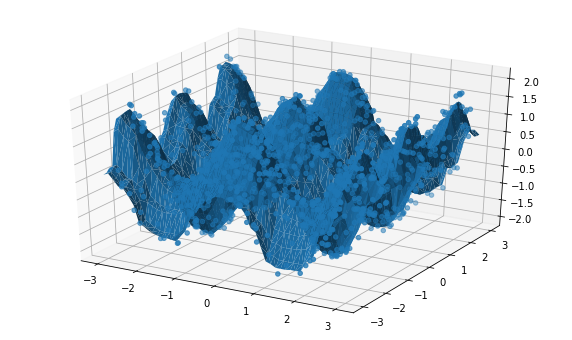

In [ ]:
# Plot the prediction surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y)

# Surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
xgrid = np.vstack((xx.flatten(), yy.flatten())).T
yhat = modelRFR.predict(xgrid).flatten()
ax.plot_trisurf(xgrid[:,0], xgrid[:,1], yhat, linewidth=0.2, antialiased=True)

Based by plot, we see that for the random forest, the predictions are a lot **more bumpy** and **jagged**, this makes sense considering that the random forest is just the average of a bunch of decision trees.


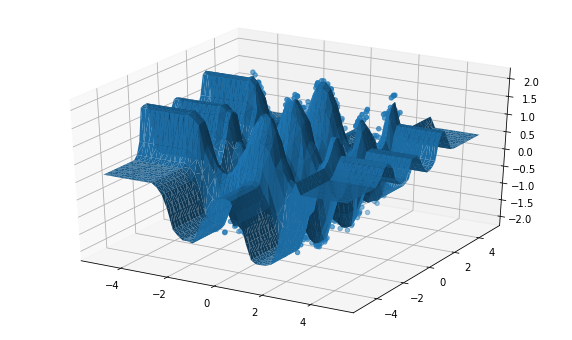

In [ ]:
# Can it extrapolation?
# Plot the prediction surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y)

# Surface the plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
xgrid = np.vstack((xx.flatten(), yy.flatten())).T
yhat = modelRFR.predict(xgrid).flatten()
ax.plot_trisurf(xgrid[:,0], xgrid[:,1], yhat, linewidth=0.2, antialiAsed=True)
plt.show()

Based by plot, we see that the random forest simply projects **outward** the last known prediction.
Again, this makes sense, considering what we know about decision trees, there are no more decision splits beyond the trading values and we know that decision Trees learn horizontal lines.


### **Multi Layer Perceptron (Neural Network) Models**

In [ ]:
modelMLP = MLPRegressor(hidden_layer_sizes=128, alpha=0, learning_rate_init=0.01)
modelMLP.fit(x, y)

MLPRegressor(alpha=0, hidden_layer_sizes=128, learning_rate_init=0.01)

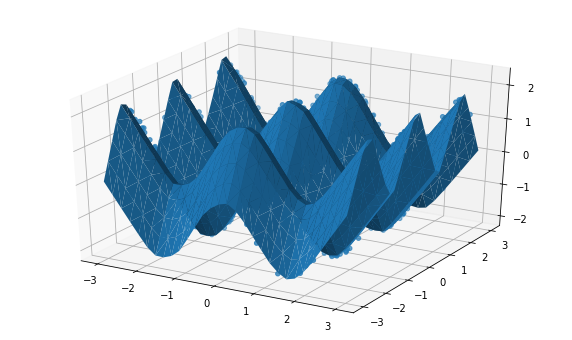

In [ ]:
# Plot the prediction surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y)

# Surface plot
line = np.linspace(-3, 3, 30)
xx, yy = np.meshgrid(line, line)
xgrid = np.vstack((xx.flatten(), yy.flatten())).T
yhat = modelMLP.predict(xgrid).flatten()
ax.plot_trisurf(xgrid[:,0], xgrid[:,1], yhat, linewidth=0.2, antialiased=True)

Based by plot results, the neural network seems to fit pretty well, maybe even better than the others.


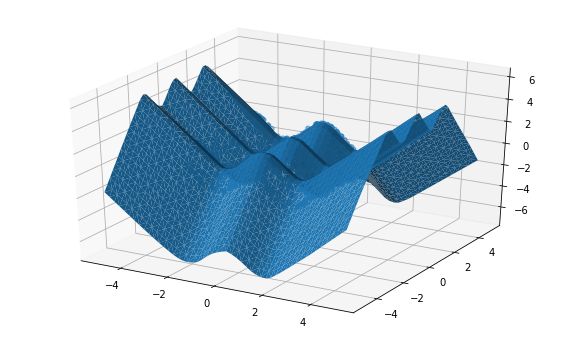

In [ ]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y)

# Surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
xgrid = np.vstack((xx.flatten(), yy.flatten())).T
yhat = modelMLP.predict(xgrid).flatten()
ax.plot_trisurf(xgrid[:,0], xgrid[:,1], yhat, linewidth=0.2, antialiased=True)
plt.show()

Based by plot, we see that the neural network simply extends the prediction out in a straight line.
This will make perfect sense once you know how neural networks actually work.


## Implementation on Stock Prices (Real Dataset)

We're going to see how this concept of **extrapolation applies to stock prices**.
Remember what we have just learned?

We've learned that **machine learning models cannot extrapolate**.
We've just tried a few of the most powerful go to machine learning methods, and we've seen that they **completely fail** at this task.


In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/SPY.csv

--2022-02-07 02:18:01--  https://lazyprogrammer.me/course_files/SPY.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251935 (246K) [text/csv]
Saving to: ‘SPY.csv’

SPY.csv             100%[===================>] 246.03K  1.28MB/s    in 0.2s    

2022-02-07 02:18:02 (1.28 MB/s) - ‘SPY.csv’ saved [251935/251935]



In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('SPY.csv', index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [ ]:
df.shape

(2263, 6)

In [ ]:
# two thousand as the split point
train = df.iloc[:2000]['Close'].to_numpy()
test = df.iloc[2000:]['Close'].to_numpy()

In [ ]:
train

array([113.33000183, 113.62999725, 113.70999908, ..., 264.07000732,
       265.51000977, 266.30999756])

Next step is to create pretend the inputs will pretend that what we'd like to do is build an auto regressive model with two legs, that is X of T depends on X of T minus one and X of T minus two.

This is only so that we'll be able to plot this later on.

OK, so it's basically the same loop for both training and test.



In [ ]:
xtrain = []
for t in range(len(train) - 1):
  x0 = train[t]
  x1 = train[t + 1]
  xtrain.append((x0, x1))

xtest = []
for t in range(len(test) - 1):
  x0 = test[t]
  x1 = test[t + 1]
  xtest.append((x0, x1))

In [ ]:
xtrain

[(113.33000183105467, 113.62999725341795),
 (113.62999725341795, 113.70999908447266),
 (113.70999908447266, 114.19000244140624),
 (114.19000244140624, 114.56999969482422),
 (114.56999969482422, 114.7300033569336),
 (114.7300033569336, 113.66000366210938),
 (113.66000366210938, 114.62000274658205),
 (114.62000274658205, 114.93000030517578),
 (114.93000030517578, 113.63999938964844),
 (113.63999938964844, 115.05999755859376),
 (115.05999755859376, 113.88999938964844),
 (113.88999938964844, 111.6999969482422),
 (111.6999969482422, 109.20999908447266),
 (109.20999908447266, 109.7699966430664),
 (109.7699966430664, 109.30999755859376),
 (109.30999755859376, 109.83000183105467),
 (109.83000183105467, 108.56999969482422),
 (108.56999969482422, 107.38999938964844),
 (107.38999938964844, 109.05999755859376),
 (109.05999755859376, 110.37999725341795),
 (110.37999725341795, 109.83000183105467),
 (109.83000183105467, 106.44000244140624),
 (106.44000244140624, 106.66000366210938),
 (106.66000366210

In [ ]:
xtest

[(266.7799987792969, 266.75),
 (266.75, 265.6600036621094),
 (265.6600036621094, 266.510009765625),
 (266.510009765625, 268.20001220703125),
 (268.20001220703125, 267.1700134277344),
 (267.1700134277344, 267.0299987792969),
 (267.0299987792969, 267.5799865722656),
 (267.5799865722656, 267.510009765625),
 (267.510009765625, 267.19000244140625),
 (267.19000244140625, 267.32000732421875),
 (267.32000732421875, 267.8699951171875),
 (267.8699951171875, 266.8599853515625),
 (266.8599853515625, 268.7699890136719),
 (268.7699890136719, 270.4700012207031),
 (270.4700012207031, 271.6099853515625),
 (271.6099853515625, 273.4200134277344),
 (273.4200134277344, 273.9200134277344),
 (273.9200134277344, 274.5400085449219),
 (274.5400085449219, 274.1199951171875),
 (274.1199951171875, 276.1199951171875),
 (276.1199951171875, 277.9200134277344),
 (277.9200134277344, 276.9700012207031),
 (276.9700012207031, 279.6099853515625),
 (279.6099853515625, 279.1400146484375),
 (279.1400146484375, 280.41000366210

In [ ]:
# convert dataset tu numpy array to ease for index-ing
xtrain = np.array(xtrain)
xtest = np.array(xtest)

In [ ]:
xtrain

array([[113.33000183, 113.62999725],
       [113.62999725, 113.70999908],
       [113.70999908, 114.19000244],
       ...,
       [263.23999023, 264.07000732],
       [264.07000732, 265.51000977],
       [265.51000977, 266.30999756]])

In [ ]:
xtest

array([[266.77999878, 266.75      ],
       [266.75      , 265.66000366],
       [265.66000366, 266.51000977],
       [266.51000977, 268.20001221],
       [268.20001221, 267.17001343],
       [267.17001343, 267.02999878],
       [267.02999878, 267.57998657],
       [267.57998657, 267.51000977],
       [267.51000977, 267.19000244],
       [267.19000244, 267.32000732],
       [267.32000732, 267.86999512],
       [267.86999512, 266.85998535],
       [266.85998535, 268.76998901],
       [268.76998901, 270.47000122],
       [270.47000122, 271.60998535],
       [271.60998535, 273.42001343],
       [273.42001343, 273.92001343],
       [273.92001343, 274.54000854],
       [274.54000854, 274.11999512],
       [274.11999512, 276.11999512],
       [276.11999512, 277.92001343],
       [277.92001343, 276.97000122],
       [276.97000122, 279.60998535],
       [279.60998535, 279.14001465],
       [279.14001465, 280.41000366],
       [280.41000366, 282.69000244],
       [282.69000244, 283.29000854],
 

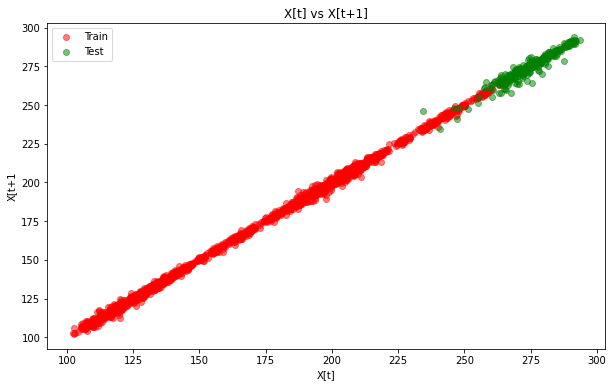

In [ ]:
plt.figure(figsize=(10, 6))
plt.xlabel('X[t]')
plt.ylabel('X[t+1')
plt.title("X[t] vs X[t+1]")
plt.scatter(xtrain[:,0], xtrain[:,1], c='r', alpha=0.5, label='Train')
plt.scatter(xtest[:,0], xtest[:,1], c='g', alpha=0.5, label='Test')
plt.legend();

Based by plot results, we can see that the train inputs and the test inputs **occupy a totally different area of the input space**.

Note that I've squashed the plot down in the vertical direction just so that we can see it fit on the screen.

But in actuality, this would look more like a 45 degree line.

Basically, what this is saying is that if you use **stock prices as inputs** into a **machine learning model**, **the test data would require extrapolation**.

The model only gets to train on the red range of values.

The green range of values is never observed.


In [ ]:
# Exercise: if you believe that "min-max scalling" will help, try it
# (though it should be obvious why it yields the same result)